In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [183]:
def linear(nu, k, b):
    return k*nu + b
def getFit(nu, i):
    popt, pcov = curve_fit(linear, nu, i, absolute_sigma=True)
    k, b = popt
    sigma_k, sigma_b = np.sqrt(np.diag(pcov))
    return k, sigma_k, b, sigma_b
def plotFit(nu, i, color, label, fix=False):
    plt.plot(nu, i, color=color, marker='o', linewidth=0, label=label)
    if fix==True:
        plt.plot(nu, i+0.03, color='skyblue', marker='o', linewidth=0, label=label+', shifted by 0.03 A')
        plt.plot(nu, linear(nu, getFit(nu, i)[0], getFit(nu, i)[2]), color='skyblue', linewidth=1)
    plt.errorbar(nu, i, yerr=0.01, color=color, fmt='none')
    plt.plot(nu, linear(nu, getFit(nu, i)[0], getFit(nu, i)[2]), color=color, linewidth=1)
def table(nu, i, ii=np.array([0])):
    df = pd.DataFrame(data={'frequency / MHz': nu, 'current (power supply measurement) / A': i})
    if ii.all() != 0:
        df = pd.DataFrame(data={'frequency / MHz': nu, 'current (multimeter measurement) / A': i, 'current (power supply) / A':\
                                ii})
    return df
def getChiSq(nu, i, sigma=0.01):
    chi_sq = 0
    for j in range(len(i)):
        chi_sq += ( (i[j] - linear(nu, getFit(nu, i)[0], getFit(nu, i)[2])[j]) / sigma)**2
    return chi_sq
def getRedChiSq(nu, i, sigma=0.01):
    chi_sq = getChiSq(nu, i, sigma=0.01)
    red_chi_sq = chi_sq / (len(i) - 2)
    print 'reduced chi-square =', '%.2f'%(red_chi_sq)

In [193]:
getRedChiSq(nu85p, i85p+0.03)
getRedChiSq(nu87p, i87p)
getRedChiSq(nu85n, i85n+0.03)
getRedChiSq(nu87n, i87n)

reduced chi-square = 0.95
reduced chi-square = 3.64
reduced chi-square = 0.09
reduced chi-square = 0.32


In [188]:
nu85p = np.array([2.24, 2.2, 2.0, 1.5, 1.0, 0.5, 2.3, 2.5, 3.0, 3.5, 4, 4.5])
i85p = np.array([0.98, 0.96, 0.86, 0.62, 0.37, 0.11, 1.0, 1.09, 1.34, 1.60, 1.84, 2.06])
nu87p = np.array([3.37, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5])
i87p = np.array([1.012, 0.8915, 0.7422, 0.583, 0.406, 0.2426, 0.0666, 1.2107, 1.3632, 1.4978, 1.7156, 1.8974, 2.0424])
nu85n = nu85p[:-2]
i85n = np.array([1.16, 1.14, 1.05, 0.81, 0.56, 0.32, 1.19, 1.29, 1.53, 1.77])
nu87n = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.37, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5])
i87n = np.array([0.2501, 0.4099, 0.5722, 0.7322, 0.8941, 1.0608, 1.1709, 1.3920, 1.5498, 1.7097, 1.8597, 2.0252, 2.1824])

In [189]:
i87pi = np.array([0.99, 0.87, 0.72, 0.56, 0.39, 0.23, 0.06, 1.18, 1.33, 1.46, 1.68, 1.84, 2.00])
i87ni = np.array([0.24, 0.39, 0.55, 0.71, 0.88, 1.03, 1.14, 1.36, 1.52, 1.68, 1.82, 1.99, 2.14])
i87d = np.concatenate((i87p, i87n)) - np.concatenate((i87pi, i87ni))
print np.mean(i87d), np.std(i87d)

0.027692307692307683 0.011290531195411305


In [190]:
print getFit(nu85p, i85p+0.03)
print getFit(nu87p, i87p)
print getFit(nu85n, i85n+0.03)
print getFit(nu87n, i87n)

(0.4881205938774521, 0.2569220159809467, -0.09022051334635028, 0.6893845470398995)
(0.32607611455292607, 0.1482244560753692, -0.0863902549346327, 0.5869632231934535)
(0.4833586623875257, 0.37442840430786795, 0.1095141346966998, 0.8384822035248997)
(0.3230446922974987, 0.14822445655537603, 0.08865094705591703, 0.5869632239572358)


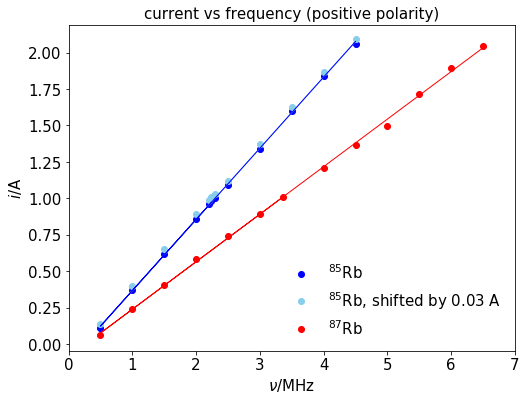

In [186]:
fig = plt.figure(figsize=(8,6))
plotFit(nu85p, i85p, 'blue', '$^{85}$Rb', fix=True)
plotFit(nu87p, i87p, 'red', '$^{87}$Rb')
plt.title('current vs frequency (positive polarity)', fontsize=15)
plt.ylabel('$i$/A', fontsize=15)
plt.xlabel(r'$\nu$/MHz', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(left=0, right=7)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.savefig('images/positive.png', bbox_inches='tight')

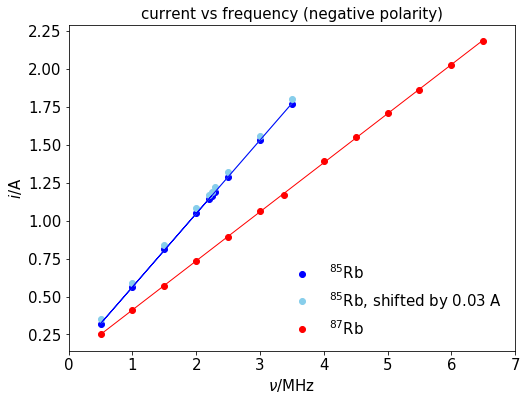

In [191]:
fig = plt.figure(figsize=(8,6))
plotFit(nu85n, i85n, 'blue', '$^{85}$Rb', fix=True)
plotFit(nu87n, i87n, 'red', '$^{87}$Rb')
plt.title('current vs frequency (negative polarity)', fontsize=15)
plt.ylabel('$i$/A', fontsize=15)
plt.xlabel(r'$\nu$/MHz', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(left=0, right=7)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.savefig('images/negative.png', bbox_inches='tight')

In [176]:
table(nu85p, i85p)

,current (power supply measurement) / A,frequency / MHz
0,0.98,2.24
1,0.96,2.20
2,0.86,2.00
3,0.62,1.50
4,0.37,1.00
5,0.11,0.50
6,1.00,2.30
7,1.09,2.50
8,1.34,3.00
9,1.60,3.50


In [179]:
table(nu87p, i87p, ii=i87pi)

,current (multimeter measurement) / A,current (power supply) / A,frequency / MHz
0,1.0120,0.99,3.37
1,0.8915,0.87,3.00
2,0.7422,0.72,2.50
3,0.5830,0.56,2.00
4,0.4060,0.39,1.50
5,0.2426,0.23,1.00
6,0.0666,0.06,0.50
7,1.2107,1.18,4.00
8,1.3632,1.33,4.50
9,1.4978,1.46,5.00


In [184]:
table(nu85n, i85n)

,current (power supply measurement) / A,frequency / MHz
0,1.16,2.24
1,1.14,2.20
2,1.05,2.00
3,0.81,1.50
4,0.56,1.00
5,0.32,0.50
6,1.19,2.30
7,1.29,2.50
8,1.53,3.00
9,1.77,3.50


In [192]:
table(nu87n, i87n, ii=i87ni)

,current (multimeter measurement) / A,current (power supply) / A,frequency / MHz
0,0.2501,0.24,0.50
1,0.4099,0.39,1.00
2,0.5722,0.55,1.50
3,0.7322,0.71,2.00
4,0.8941,0.88,2.50
5,1.0608,1.03,3.00
6,1.1709,1.14,3.37
7,1.3920,1.36,4.00
8,1.5498,1.52,4.50
9,1.7097,1.68,5.00
